# Determing Optimal Match Number for FDR Calculations (library peak max = 31)

In [1]:
import pandas as pd
import re
from matplotlib import pyplot
import csodiaq_base_functions as cbf
import csodiaq_figure_functions as cff
import csodiaq_menu_functions as menu
import os
from matplotlib.font_manager import FontProperties
pd.set_option('display.max_rows', None)

## Loading Results

In [21]:
files = list(os.listdir('Data/Output'))
removables = ['unfilteredPpmPerRow', 'filteredBestMatch', 'offset_tolerance', 'ppmSpread', 'ppmSpreadDecoy', '.DS_Store']
csodiaq = []
check = True
for f in files:
    for r in removables:
        if r in f:
            check = False
    if check:
        csodiaq.append('Data/Output/'+f)
    check = True

csodiaq = sorted(csodiaq)
for x in csodiaq: print(x)

Data/Output/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt.csv
Data/Output/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt_corrected.csv


In [22]:
#for x in csodiaq: print(x); cff.write_meta_analysis_files(x)
listOfFiles = list(os.listdir('Data/Figures/FDRGraphs/'))
listOfFiles = sorted(['Data/Figures/FDRGraphs/'+x for x in listOfFiles])
print(len(listOfFiles))

#listOfFiles = listOfFiles[:16]
#listOfFiles = listOfFiles[16:34]
#listOfFiles = listOfFiles[34:52]
#listOfFiles = listOfFiles[52:70]
#listOfFiles = listOfFiles[70:]

#listOfFiles = [x for x in listOfFiles if '5peaks' in x]
listOfFiles = [x for x in listOfFiles if '10peaks' in x]
#listOfFiles = [x for x in listOfFiles if '20peaks' in x]
#listOfFiles = [x for x in listOfFiles if '31peaks' in x]


listOfFiles

Data/Output/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt.csv
Data/Output/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt_corrected.csv
73


['Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-400to2000_exp-n1b_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-400to2000_exp-n1b_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-400to2000_exp-n1b_FDRGraph_spectral.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-400to2000_exp-n1b_corrected_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_spectral.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-

In [23]:
def make_graph_df(listOfFiles):
    concatLists = []
    for file in listOfFiles:
        temp = pd.read_csv(file)
        groupName = re.sub('Data/Figures/FDRGraphs/(.*)\.csv', r'\1', file)
        temp['group'] = [groupName for x in range(len(temp))]
        concatLists.append(temp)
    return pd.concat(concatLists)

In [24]:
spectrum = make_graph_df([x for x in listOfFiles if 'spectral' in x])
spectrum

matches  FDRCutoff   total    cosine  FDRDecoys  totalDecoys  \
0        4          0   87831  0.000000          0        21303   
1        5          0   36630  0.000000          0         4776   
2        6      13540   18050  0.938427        135          890   
3        7       9882   10102  0.790442         98          136   
4        8       5744    5744  0.435951         13           14   
5        9       3183    3183  0.596722          0            1   
6       10       1436    1436  0.659399         -1            0   
7       11          2       2  0.948456         -1            0   
0        4          0   31422  0.000000          0         2590   
1        5          0   17140  0.000000          0          412   
2        6      10271   10271  0.366327         57           58   
3        7       6348    6348  0.397434          8            9   
4        8       3741    3741  0.643816          2            3   
5        9       2106    2106  0.721928         -1            0   
6       10        903     903  0.864171         -1            0   
0        4          0   85713  0.000000          0        20693   
1        5          0   35728  0.000000          0         4657   
2        6      13234   17488  0.937613        132          858   
3        7       9480    9678  0.787391         94          129   
4        8       5462    5462  0.435951          7            8   
5        9       2999    2999  0.596722         -1            0   
6       10       1347    1347  0.666340         -1            0   
7       11          1       1  0.990836         -1            0   
0        4          0   30841  0.000000          0         2541   
1        5          0   16717  0.000000          0          392   
2        6       9947    9947  0.366327         57           58   
3        7       6053    6053  0.397434          7            8   
4        8       3532    3532  0.643816          0            1   
5        9       1993    1993  0.721928         -1            0   
6       10        838     838  0.864171         -1            0   
0        4          0  447650  0.000000          0       161565   
1        5          0  190021  0.000000          0        55210   
2        6        258   81129  0.997653          2        16230   
3        7      12435   37577  0.964419        124         4066   
4        8      14258   19354  0.903739        142          785   
5        9      10036   10148  0.707000        100          117   
6       10       4432    4432  0.520098          5            6   
7       11         15      15  0.818785         -1            0   
0        4          0  216196  0.000000          0        66396   
1        5          0   81696  0.000000          0        17003   
2        6      11256   36287  0.972052        112         3808   
3        7      13747   19439  0.921262        137          743   
4        8      11174   11192  0.578500        111          115   
5        9       6299    6299  0.425078         10           11   
6       10       2664    2664  0.709585         -1            0   

                                               group  
0  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
1  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
2  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
3  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
4  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
5  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
6  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
7  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
0  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
1  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
2  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
3  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
4  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
5  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
6  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
0  csodiaq_lib-human-10peaks-noloss-pt2m

In [25]:
peptide = make_graph_df([x for x in listOfFiles if 'peptide' in x])
peptide

matches  FDRCutoff  total    cosine  FDRDecoys  totalDecoys  \
0        4          0  34552  0.000000          0        11433   
1        5          0  14386  0.000000          0         3215   
2        6       3124   6332  0.974617         31          673   
3        7       2874   3279  0.906956         28          110   
4        8       1889   1889  0.506024         12           13   
5        9       1046   1046  0.596722          0            1   
6       10        522    522  0.659399         -1            0   
7       11          2      2  0.948456         -1            0   
0        4          0  10388  0.000000          0         1538   
1        5          0   5264  0.000000          0          276   
2        6       3038   3097  0.796562         30           44   
3        7       1938   1938  0.511570          6            7   
4        8       1187   1187  0.643816          2            3   
5        9        711    711  0.831634         -1            0   
6       10        344    344  0.868731         -1            0   
0        4          0  33738  0.000000          0        11087   
1        5          0  14006  0.000000          0         3141   
2        6       3111   6147  0.973690         31          641   
3        7       2766   3166  0.911768         27          104   
4        8       1794   1794  0.506024          7            8   
5        9        988    988  0.596722         -1            0   
6       10        487    487  0.821393         -1            0   
7       11          1      1  0.990836         -1            0   
0        4          0  10204  0.000000          0         1508   
1        5          0   5136  0.000000          0          262   
2        6       2967   3025  0.796562         29           43   
3        7       1858   1858  0.511570          7            8   
4        8       1123   1123  0.643816          0            1   
5        9        685    685  0.831634         -1            0   
6       10        311    311  0.868731         -1            0   
0        4          0  94175  0.000000          0        39765   
1        5          0  53871  0.000000          0        19397   
2        6        188  27068  0.997683          1         7415   
3        7       2770  12955  0.979126         27         2312   
4        8       3163   6358  0.952912         31          549   
5        9       2805   3277  0.879233         28           97   
6       10       1521   1521  0.520098          5            6   
7       11         15     15  0.818785         -1            0   
0        4          0  51867  0.000000          0        18562   
1        5          0  24444  0.000000          0         6601   
2        6       2677  11428  0.982579         26         1832   
3        7       3207   5998  0.955829         32          434   
4        8       3098   3389  0.848002         30           81   
5        9       1989   1989  0.425078          7            8   
6       10        942    942  0.744253         -1            0   

                                               group  
0  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
1  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
2  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
3  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
4  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
5  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
6  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
7  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
0  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
1  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
2  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
3  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
4  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
5  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
6  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
0  csodiaq_lib-human-10peaks-noloss-pt2mz-400to20...  
1  csodiaq_lib-human-10peaks-no

In [26]:
protein = make_graph_df([x for x in listOfFiles if 'protein' in x])
protein

matches  FDRCutoff  total    cosine  FDRDecoys  totalDecoys  \
0        4          0   9858  0.000000          0         4354   
1        5          0   5731  0.000000          0         2122   
2        6        637   2565  0.991312          6          597   
3        7        841   1210  0.946127          8          107   
4        8        651    688  0.854192          6           13   
5        9        437    437  0.596722          0            1   
6       10        255    255  0.821393         -1            0   
7       11          2      2  0.948456         -1            0   
0        4          0   4099  0.000000          0         1217   
1        5          0   1838  0.000000          0          261   
2        6        874   1023  0.936472          8           43   
3        7        666    672  0.721905          6            7   
4        8        455    455  0.643816          2            3   
5        9        318    318  0.833136         -1            0   
6       10        179    179  0.893215         -1            0   
0        4          0   9724  0.000000          0         4289   
1        5          0   5630  0.000000          0         2075   
2        6        705   2502  0.989296          7          573   
3        7        825   1186  0.948002          8          102   
4        8        651    666  0.745318          6            8   
5        9        416    416  0.596722         -1            0   
6       10        243    243  0.821393         -1            0   
7       11          1      1  0.990836         -1            0   
0        4          0   4055  0.000000          0         1207   
1        5          0   1802  0.000000          0          247   
2        6        868   1010  0.936472          8           42   
3        7        655    662  0.724952          6            8   
4        8        436    436  0.643816          0            1   
5        9        303    303  0.833136         -1            0   
6       10        164    164  0.893215         -1            0   
0        4          0  14192  0.000000          0         6823   
1        5          0  11836  0.000000          0         5401   
2        6          0   8673  0.000000          0         3516   
3        7        550   5161  0.991065          5         1642   
4        8        809   2558  0.971288          8          483   
5        9        833   1215  0.915414          8           94   
6       10        597    598  0.584143          5            6   
7       11         15     15  0.818785         -1            0   
0        4          0  11736  0.000000          0         5301   
1        5          0   8225  0.000000          0         3294   
2        6        177   4611  0.997527          1         1360   
3        7        852   2305  0.971042          8          403   
4        8        834   1211  0.931686          8           80   
5        9        689    713  0.802495          6            8   
6       10        399    399  0.805296         -1            0   

                                               group  
0  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
1  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
2  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
3  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
4  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
5  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
6  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
7  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
0  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
1  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
2  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
3  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
4  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
5  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
6  csodiaq_lib-human-10peaks-noloss-400to2000_exp...  
0  csodiaq_lib-human-10peaks-noloss-pt2mz-400to20...  
1  csodiaq_lib-human-10peaks-no

In [27]:
fontP = FontProperties()
fontP.set_size('xx-small')

## Optimal FDR Cutoff

### Spectral Level Analysis

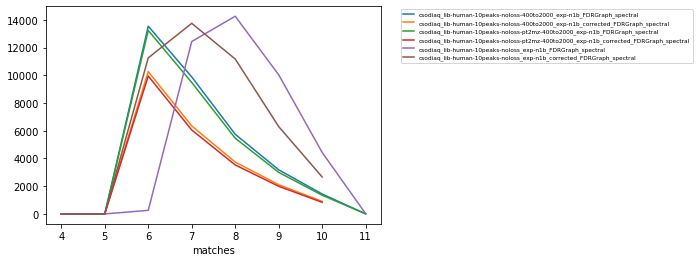

In [28]:
spectrumFDR = spectrum.pivot(index='matches', columns='group', values='FDRCutoff')
spectrumFDR.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

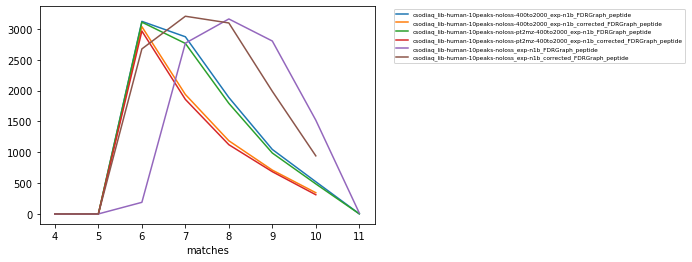

In [29]:
peptideFDR = peptide.pivot(index='matches', columns='group', values='FDRCutoff')
peptideFDR.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

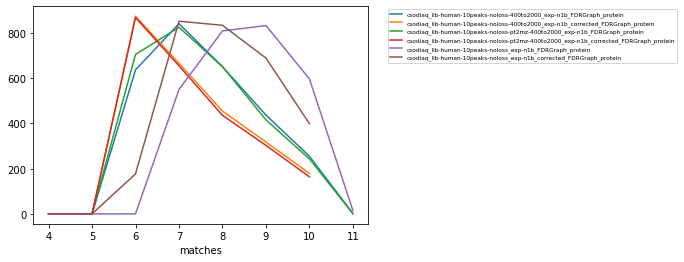

In [30]:
proteinFDR = protein.pivot(index='matches', columns='group', values='FDRCutoff')
proteinFDR.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## Percentage FDR Representation

### Data Rearrangement

In [35]:
spectrum = spectrum.reset_index(drop=True)
peptide = spectrum.reset_index(drop=True)
protein = protein.reset_index(drop=True)

spectrum['%'] = [(spectrum['FDRCutoff'].loc[i]/spectrum['total'].loc[i]) for i in range(len(spectrum))]
peptide['%'] = [(peptide['FDRCutoff'].loc[i]/peptide['total'].loc[i]) for i in range(len(peptide))]
protein['%'] = [(protein['FDRCutoff'].loc[i]/protein['total'].loc[i]) for i in range(len(protein))]

### Spectrum Level Analysis

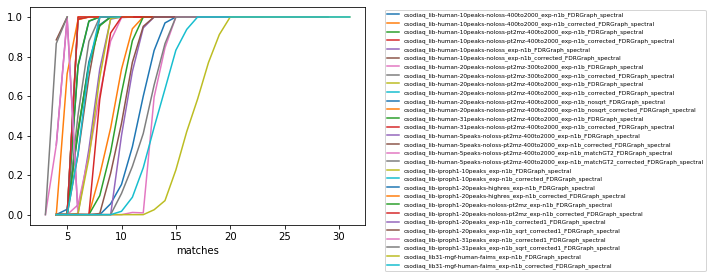

In [36]:
spectrumPerc = spectrum.pivot(index='matches', columns='group', values='%')
spectrumPerc.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

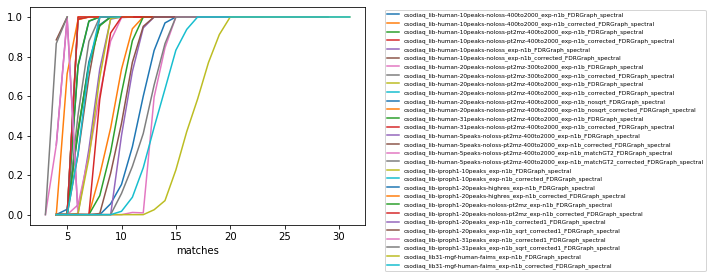

In [37]:
peptidePerc = peptide.pivot(index='matches', columns='group', values='%')
peptidePerc.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

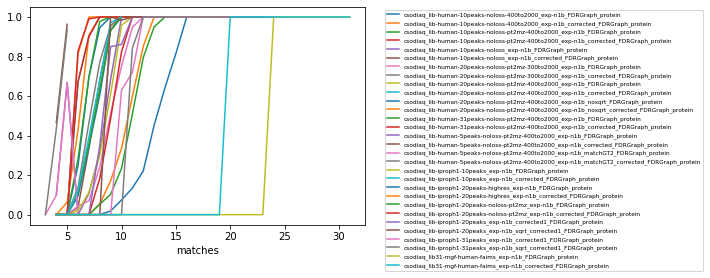

In [38]:
proteinPerc = protein.pivot(index='matches', columns='group', values='%')
proteinPerc.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## Cosine

### Spectrum Level Analysis

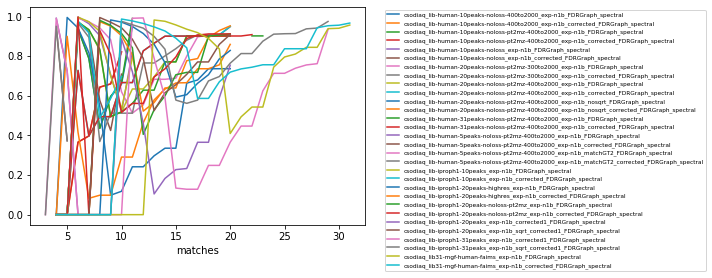

In [39]:
spectrumCos = spectrum.pivot(index='matches', columns='group', values='cosine')
spectrumCos.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

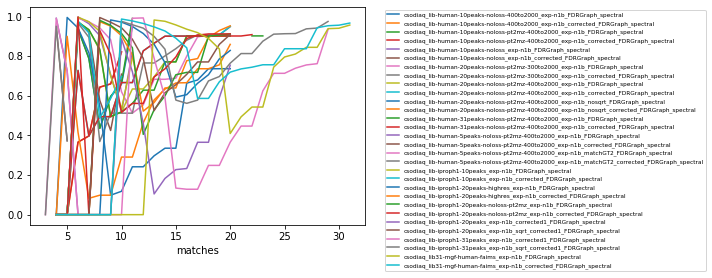

In [40]:
peptideCos = peptide.pivot(index='matches', columns='group', values='cosine')
peptideCos.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

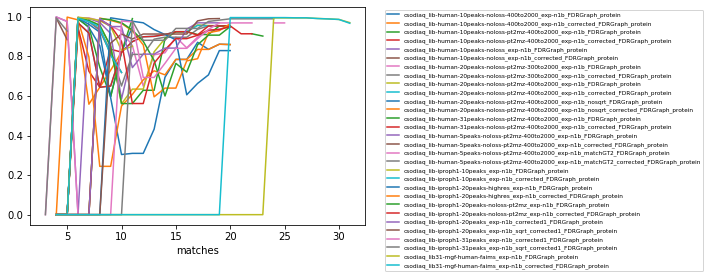

In [41]:
proteinCos = protein.pivot(index='matches', columns='group', values='cosine')
proteinCos.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## Decoys (total)

### Spectral Level Analysis

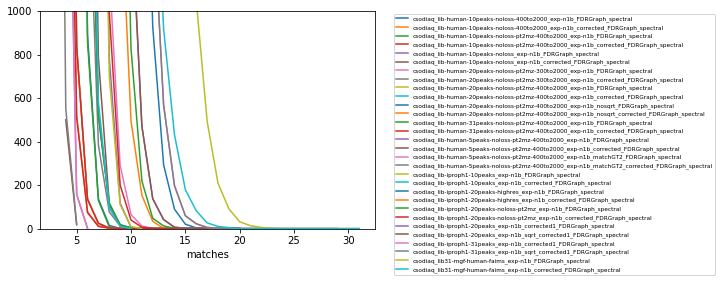

In [42]:
spectrumDec = spectrum.pivot(index='matches', columns='group', values='totalDecoys')
p1 = spectrumDec.plot()
p1.set_ylim(0,1000)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

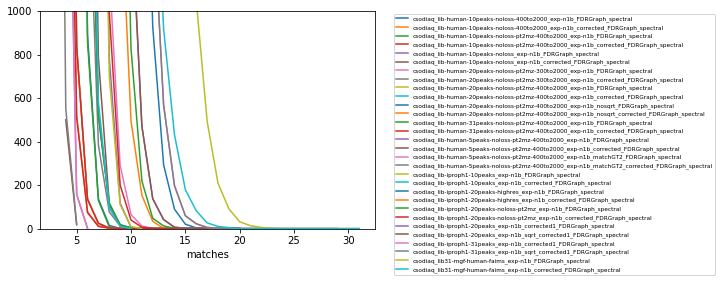

In [43]:
peptideDec = peptide.pivot(index='matches', columns='group', values='totalDecoys')
p2 = peptideDec.plot()
p2.set_ylim(0,1000)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

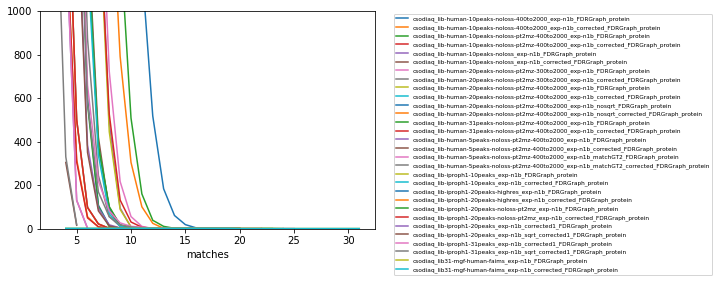

In [44]:
proteinDec = protein.pivot(index='matches', columns='group', values='totalDecoys')
p3 = proteinDec.plot()
p3.set_ylim(0,1000)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## Histograms With Decoys

### Spectral Level Analysis

#enter csodiaq ppm spread file creation:
#2:11:27.572490
1
2
3
4
5
#Complete
#2:11:46.485636
#enter csodiaq ppm spread file creation:
#2:11:46.485805
1
2
3
4
5
#Complete
#2:11:50.586732
Data/Output/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b.csv
439895
158127


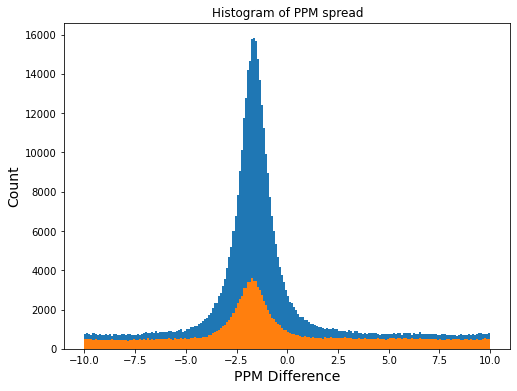

Data/Output/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b_corrected.csv
191513
20174


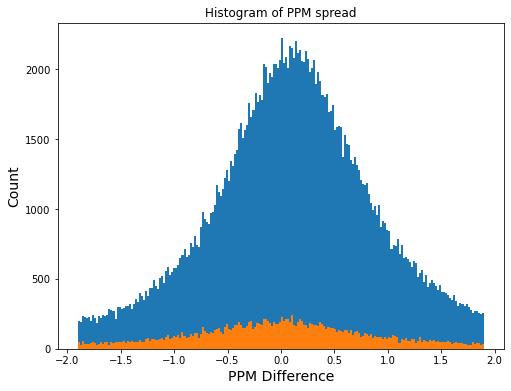

In [45]:
for x in csodiaq: menu.write_ppm_spread_decoy(x)
for x in csodiaq: 
    print(x)
    cff.draw_histogram_decoy(x)